**Исследование поездок пользователей разных городов аренды самокатов GoFast**
Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:без подписки абонентская плата отсутствует;стоимость одной минуты поездки — 8 рублей;стоимость старта (начала поездки) — 50 рублей;с подпиской Ultra абонентская плата — 199 рублей в месяц;стоимость одной минуты поездки —6 рублей;стоимость старта — бесплатно  


**Цель исследования**:
-проверить гипотезы:
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
6.1  тратят ли пользователи с подпиской больше времени на поездки?
6.2 Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?


**Ход исследования**:
Данные о пользователях и поездках я получу из 3 CSV-файлов.Пути к файлам:
/datasets/users_go.csv
/datasets/rides_go.csv
/datasets/subscriptions_go.csv
О качестве данных ничего не известно, поэтому понадобится обзор данных. Я проверю данные на ошибки и оценю их влияние на исследование. Затем на этапе предобработки я поищу способы исправить ошибки данных, которые не ведут к искажению конечного результата. Потом создам необходимые столбцы и перейду к исследовательскому анализу.  
Таким образом мое исследование пройдет 7 этапов.  
1.Загрузка данных  
2.Предобработка данных  
3.Исследовательский анализ данных  
4.Объединение данных  
5.Подсчет выручки  
6.Проверка гипотез  
7.Распределения



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import binom
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

#### Шаг 1. Загрузка данных

In [ ]:
#загрузка данных и сохранение в датафреймы
users= pd.read_csv('/datasets/users_go.csv')

In [ ]:
#вывод первых пяти строк
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [ ]:
#вывод общей информации о датафрейме users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [ ]:
#загрузка данных и сохранение в датафреймы
rides= pd.read_csv('/datasets/rides_go.csv')

In [ ]:
#вывод первых пяти строк
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [ ]:
#вывод общей информации о датафрейме riders
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [ ]:
#загрузка данных и сохранение в датафреймы
subscriptions= pd.read_csv('/datasets/subscriptions_go.csv')



In [ ]:
#вывод первых пяти строк
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
#вывод общей информации о датафрейме riders
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Выводы по загруженным датафреймам:  
Данные были успешно загружены из трех различных CSV-файлов в соответствующие датафреймы: users_go.csv, rides_go.csv, subscriptions_go.csv.  
Эти файлы содержат информацию о пользователях сервиса, их поездках и подписках.  
Анализ Первых Строк:  
Первые строки каждого датафрейма были выведены для визуального осмотра.
Данные о пользователях включают информацию, такую как идентификатор пользователя, город, возраст и другие характеристики.
Данные о поездках включают идентификатор пользователя,длительность поездки, дистанцию и дату.
Данные о подписках, содержат информацию о типе подписки, cтоимости подписки, стоимости начала поездки и стоимости минуты.
Изучение Общей Информации:  
Была проанализирована общая информация о каждом датафрейме, включая типы данных, количество строк и столбцов, наличие пропущенных значений и т.д.  -Пропущенные значения отсутсвуют. Колонку date, которая обозначает дату поездки следует изменить с типа данных object на datetime. Месяц из данной колонки следует выделить в отдельную колонку для того, чтобы можно было оценить сезонные колебания.
Для удобства проведения анализа следует обьединить три датафрейма в один. Также следует выполнить поиск дубликатов.


#### Шаг 2. Предобработка данных

In [ ]:
#приведение date таблицы riders к типу даты pandas
rides['date'] = pd.to_datetime(rides['date'])

In [ ]:
#создание колонки  с номером месяца
rides['month_of_ride'] = rides['date'].dt.month

In [ ]:
#проверка периода данных
years = rides['date'].dt.year.unique()
display(sorted(years))


[2021]

Данные представлены только за один год

In [ ]:
rides.head()

,user_id,distance,duration,date,month_of_ride
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [ ]:
# Поиск явных дубликатов в таблице users
duplicate_rows = users.duplicated(keep=False)

# Вывод всех полных дубликатов
#print(users[duplicate_rows])

display(users[duplicate_rows])

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
46,47,Юрий,28,Тюмень,ultra
71,72,Никита,25,Москва,ultra
107,108,Влада,29,Тюмень,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [ ]:
# Удаление всех дубликатов
users.drop_duplicates(inplace=True)
# Вывод обновленной таблицы без дубликатов и с обновленным индексом
display(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [ ]:
# Обновление нумерации (индекса) в DataFrame
users.reset_index(drop=True, inplace=True)

# Вывод обновленного DataFrame с новой нумерацией
display(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [ ]:
# Поиск явных дубликатов в таблице riders
duplicate_rows = rides.duplicated(keep=False)

# Вывод всех полных дубликатов
display(rides[duplicate_rows])

,user_id,distance,duration,date,month_of_ride


In [ ]:
users.isnull().sum().sum()

0

In [ ]:
rides.isnull().sum().sum()

0

Выводы по предобработке данных:

Преобразование Типа Данных:
Столбец date был успешно преобразован в тип даты pandas. Это упрощает работу с датами в последующем анализе, позволяя корректно сортировать записи по времени, а также выполнять временные вычисления.
Добавление Столбца с Номером Месяца:
На основе столбца date был создан новый столбец, отображающий номер месяца. Это позволит проводить анализ данных на месячной основе, группируя данные по месяцам и анализируя тренды или сезонные паттерны.
Проверка Пропущенных Значений и Дубликатов:
Все датафреймы были проверены на наличие пропущенных значений. Пропущенные значения отсутствуют.
Дублирующие записи в датафреймах были выявлены и успешно удалены(62 строки в users), что устраняет возможное искажение результатов анализа из-за повторяющихся данных.
В результате предобработки данных датафреймы стали готовы к дальнейшему анализу. Отсутствие пропущенных значений и дубликатов, а также корректное представление данных (например, дат в нужном формате) обеспечивает надежную основу для проведения статистического анализа и выводов на основе этих данных

#### Шаг 3. Исследовательский анализ данных

In [ ]:
users.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

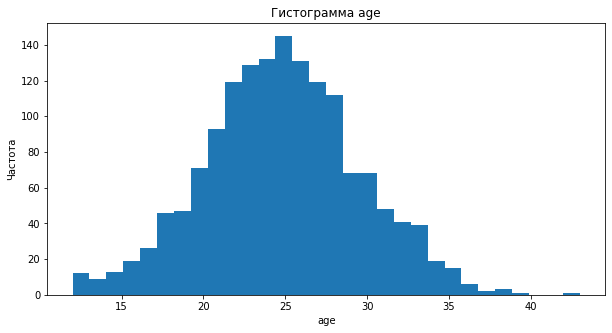

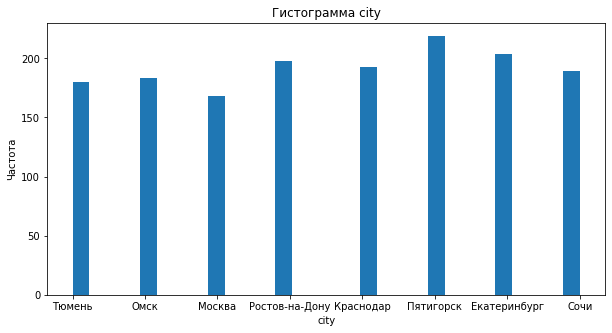

In [ ]:
# Построение гистограмм для каждой колонки users
#заданные колонки
columns_to_plot =['age', 'city']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(users[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()



In [ ]:
percentages = users['subscription_type'].value_counts(normalize=True) * 100
display(percentages)

free     54.432855
ultra    45.567145
Name: subscription_type, dtype: float64

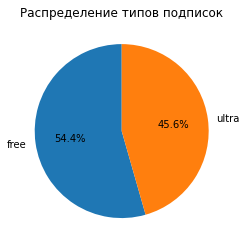

In [ ]:
#отображение соотношения типа пользователей на круговой диаграмме
percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Распределение типов подписок")
plt.ylabel("")  # Удаляем название оси y для лучшего отображения
plt.show()

In [ ]:
# Подсчет частоты встречаемости городов
city_counts = users['city'].value_counts()

# Вывод результата
display(city_counts)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [ ]:
# Подсчет частоты типа подписки
subscription_type_counts = users['subscription_type'].value_counts()

# Вывод результата
display(subscription_type_counts)

free     835
ultra    699
Name: subscription_type, dtype: int64

In [ ]:
#описание столбца  age
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [ ]:
#медианный возраст
users['age'].median()

25.0

In [ ]:
rides.columns


Index(['user_id', 'distance', 'duration', 'date', 'month_of_ride'], dtype='object')

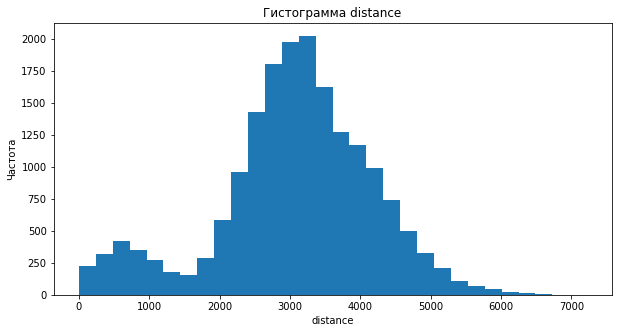

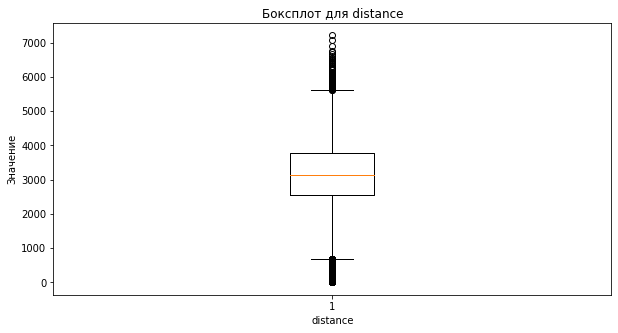

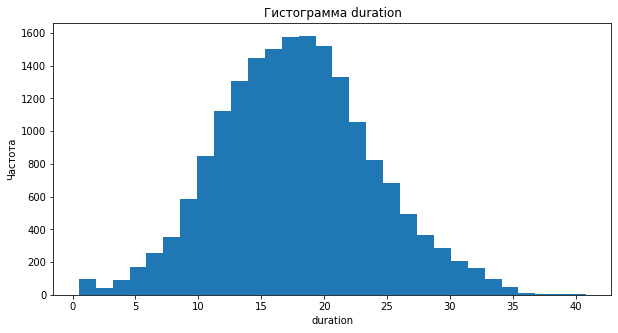

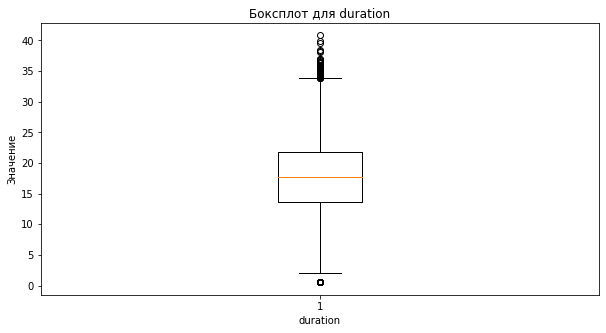

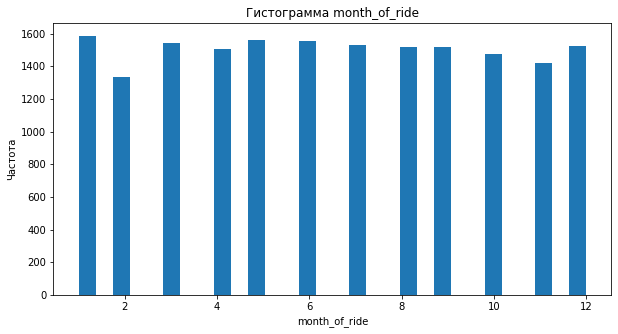

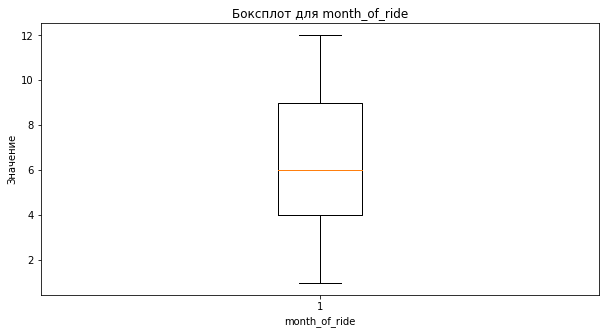

In [ ]:
# Построение гистограмм для каждой колонки rides
#заданные колонки
columns_to_plot =['distance', 'duration', 'month_of_ride']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(rides[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()

     # Боксплот
    plt.figure(figsize=(10, 5))
    plt.boxplot(rides[column])
    plt.xlabel(column)
    plt.ylabel('Значение')
    plt.title(f'Боксплот для {column}')
    plt.show()

In [ ]:
#описание столбца distance
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [ ]:
#расстояние, которое пользователь преодолел за одну поездку
rides['distance'].median()

3133.6099936787664

In [ ]:
#продолжительность поездок
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [ ]:
#продолжитешльность поездки
rides['duration'].median()

17.678394530393803

Выводы: исследовательский анализ данных:
        
Частота встречаемости городов:  
В данных присутствуют пользователи из нескольких городов. Некоторые города представлены активнее, возможно, из-за более активной рекламной кампании. Определены лидирующие города по активности пользователей, что может указывать на наиболее перспективные рынки для развития или усиления маркетинговых усилий.  Больше всего пользователей в Пятигорске(219), а меньше всего в Москве(168)
Соотношение пользователей с подпиской и без подписки:  
Было установлено, что  подписки нет у большего количества людей(835), а с подпиской ultra всего 699.  
Возраст пользователей:    

В данных выявлен диапазон возрастов пользователей.Они представляют собой широкий диапазон от подростков 12 лет до среднего возраста с максимумом в 43 года, чаще всего пользуются самокатами молодые люди 25 лет.
Расстояние, которое пользователь преодолел за одну поездку:  
Большинство поездок совершается на среднее расстояние чуть больше 3х км(3133.60м), но также на гистограмме можно увидеть и большое количество  коротких поездок. Вероятно самокаты часто используются для коротких поездок( например,от метро до дома)
Продолжительность поездок:  
Пользователи в среднем проводят 17.67 минут в пути на самокатах.

#### Шаг 4. Объединение данных

In [ ]:
#вывод размеров датасетов до объединения
display("Размер датафрейма users:", users.shape)
display("Размер датафрейма rides:", rides.shape)
display("Размер датафрейма subscriptions:",subscriptions.shape)

'Размер датафрейма users:'

(1534, 5)

'Размер датафрейма rides:'

(18068, 5)

'Размер датафрейма subscriptions:'

(2, 4)

In [ ]:
users.columns


Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

In [ ]:
rides.columns


Index(['user_id', 'distance', 'duration', 'date', 'month_of_ride'], dtype='object')

In [ ]:
subscriptions.columns

Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [ ]:
# Объединение таблиц users и rides по столбцу 'user_id'
merged_data = pd.merge(users, rides, on='user_id')



In [ ]:
# Объединение таблиц merged_data и subscription по столбцу 'subscription_type'
merged_data = pd.merge(merged_data, subscriptions, on='subscription_type')


In [ ]:

# Вывод объединенного DataFrame
display(merged_data.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_ride,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [ ]:
#проверка размерности результирующего датасета
display("Размер датафрейма merged_data:", merged_data.shape)

'Размер датафрейма merged_data:'

(18068, 12)

Размерность результирующего датасета совпадает с размерностью исходного. Следовательно объединение прошло корректно. Потеря данных и дубликаты отстутсвуют.

In [ ]:
# DataFrame с данными о пользователях без подписки (subscription_type == 'free') с помощью метода query():
users_without_subscription = merged_data.query("subscription_type == 'free'")





In [ ]:
# DataFrame с данными о пользователях с подпиской типа 'ультра' (subscription_type == 'ультра') с помощью метода query():
users_with_ultra_subscription = merged_data.query("subscription_type == 'ultra'")


In [ ]:
users_without_subscription.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'month_of_ride', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [ ]:
users_without_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month_of_ride      11568 non-null  int64         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
users_with_ultra_subscription.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month_of_ride      6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


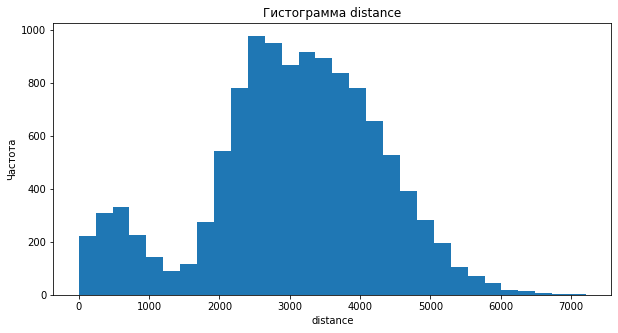

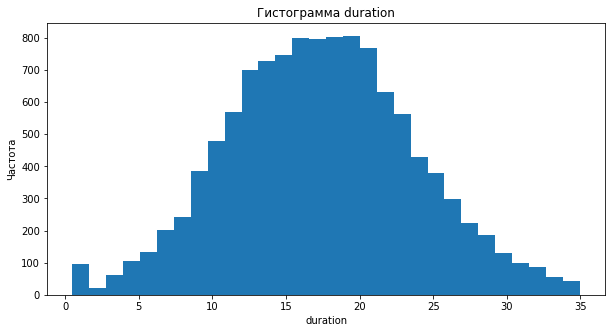

In [ ]:
# Построение гистограмм для каждой колонки users_without_subscription
#заданные колонки
columns_to_plot =['distance',
       'duration']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(users_without_subscription[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()

In [ ]:
users_without_subscription.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'month_of_ride', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')

In [ ]:
users_without_subscription['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [ ]:
users_without_subscription['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [ ]:
users_without_subscription['distance'].median()

3114.648464847295

In [ ]:
users_without_subscription['duration'].median()

17.326890226082043

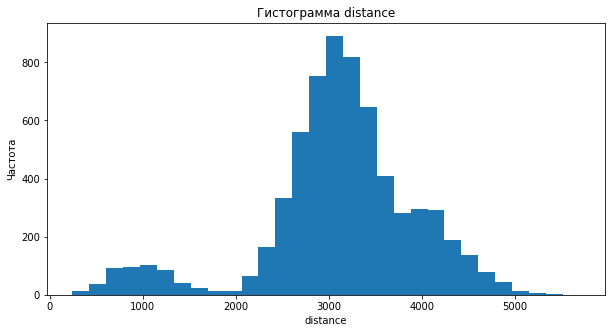

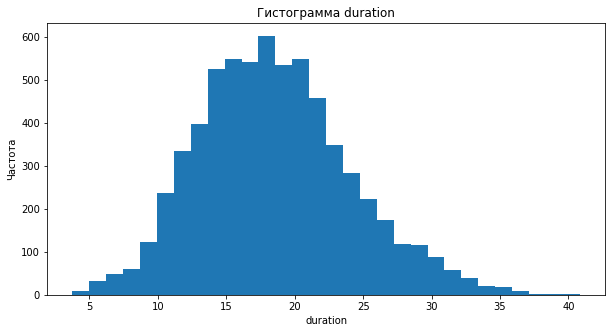

In [ ]:
# Построение гистограмм для каждой колонки users_with_ultra_subscription
#заданные колонки
columns_to_plot =['distance',
       'duration']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(users_with_ultra_subscription[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()

In [ ]:
users_with_ultra_subscription['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [ ]:
users_with_ultra_subscription['duration'].median()

18.17815320055055

In [ ]:
users_with_ultra_subscription['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [ ]:
users_with_ultra_subscription['distance'].median()

3148.6372291760854

Вывод: Обьединение данных  

Данные о пользователях, поездках и подписках были успешно объединены в одном датафрейме. Это позволит провести более детальный и комплексный анализ активности пользователей, учитывая все доступные аспекты их взаимодействия с сервисом.
Разделение данных по типам подписок:  
Для детального изучения поведения разных категорий пользователей данные были разделены на две группы: пользователи без подписки и пользователи с подпиской. Это позволит лучше понимать, какие особенности использования сервиса характерны для каждой из групп и как можно оптимизировать предложения для каждой из них.  
Визуализация данных о расстоянии и времени поездок:  
На основе графиков можно сделать вывод о том, что расстояние и продолжительность поездок различаются между пользователями с подпиской и без неё. Возможно, пользователи с подпиской чаще пользуются самокатами для длительных поездок или на большие расстояния, благодаря льготным условиям использования. Медианное время поездки с подпиской - 18.17 минуты,а медианное время поездки без подписки 17.32. Это значит, что пользователи с подпиской тратят в среднем примерно на минуту больше на поездку чем без подписки. Пользователи с подпиской реже совершают короткие поездки. Также медианная дистанция поездок у пользователей с подпиской выше (3148метров) чем у пользователей без подписки (3114.64 метра).




У пользователей без подписки значительно больше коротких поездок - до 1 км и в целом максимальная дальность поездки выше, чем у платных пользователей.

#### Шаг 5. Подсчёт выручки

In [ ]:
#проверка на пропуски в сводной таблице
total_missing = merged_data.isnull().sum().sum()
display(total_missing)

0

In [ ]:
# Функция для округления продолжительности поездки до следующего целого числа (метод "потолок")
def round_up_duration(duration):
    return np.ceil(duration)

# Применение функции округления продолжительности
merged_data['rounded_duration'] = merged_data['duration'].apply(round_up_duration)





In [ ]:

# Расчет стоимости каждой поездки
merged_data['ride_cost'] = merged_data['rounded_duration'] * merged_data['minute_price'] + merged_data['start_ride_price']



In [ ]:



aggregated_data = merged_data.groupby(['user_id', 'month_of_ride', 'subscription_type']).agg({
    'distance': 'sum',                    # Суммарное расстояние
    'duration': 'count',                  # Количество поездок
    'rounded_duration': 'sum',            # Суммарное время
    'ride_cost': 'sum',                   # Суммарная стоимость поездок
    'subscription_fee': 'mean',           # Стоимость подписки
    'start_ride_price': 'first',          # Стоимость старта поездки
    'minute_price': 'first'               # Стоимость одной минуты поездки
}).reset_index()

In [ ]:
# Переименование столбцов для ясности
aggregated_data.rename(columns={
    'distance': 'total_distance',
    'duration': 'total_rides'
}, inplace=True)


In [ ]:
aggregated_data.head()

,user_id,month_of_ride,subscription_type,total_distance,total_rides,rounded_duration,ride_cost,subscription_fee,start_ride_price,minute_price
0,1,1,ultra,7027.511294,2,42.0,252.0,199,0,6
1,1,4,ultra,754.159807,1,7.0,42.0,199,0,6
2,1,8,ultra,6723.470560,2,46.0,276.0,199,0,6
3,1,10,ultra,5809.911100,2,32.0,192.0,199,0,6
4,1,11,ultra,7003.499363,3,56.0,336.0,199,0,6


In [ ]:
aggregated_data.columns

Index(['user_id', 'month_of_ride', 'subscription_type', 'total_distance',
       'total_rides', 'rounded_duration', 'ride_cost', 'subscription_fee',
       'start_ride_price', 'minute_price'],
      dtype='object')

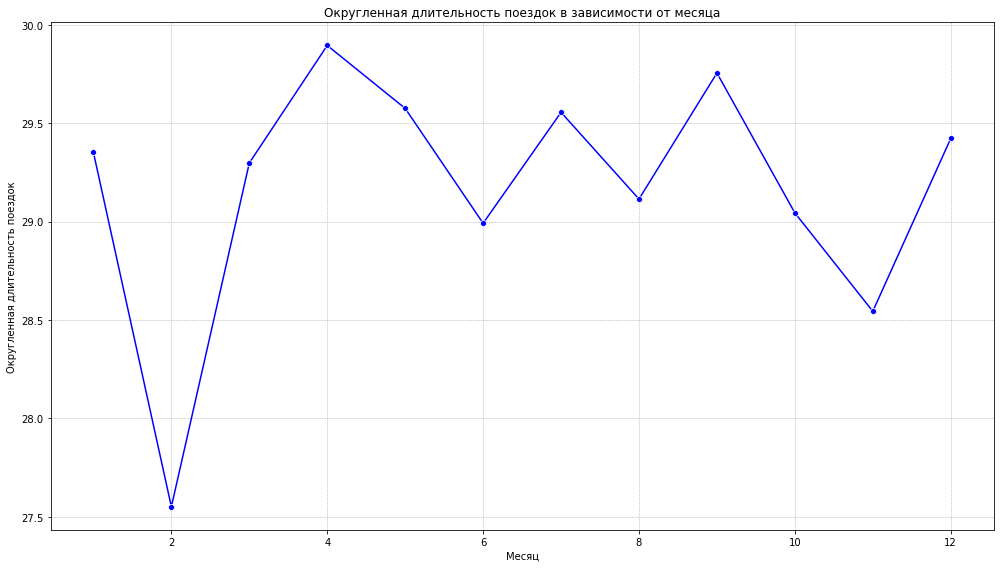

In [ ]:
#визуализация округленной длительности поездки в зависимости от месяца поездки
# Настроим стиль графиков
plt.figure(figsize=(14, 8))

# Группировка данных по месяцам и подсчет средней длительности для каждого месяца
monthly_duration = aggregated_data.groupby('month_of_ride')['rounded_duration'].mean()

sns.lineplot(data=monthly_duration, marker='o', color='blue')

plt.title('Округленная длительность поездок в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Округленная длительность поездок')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

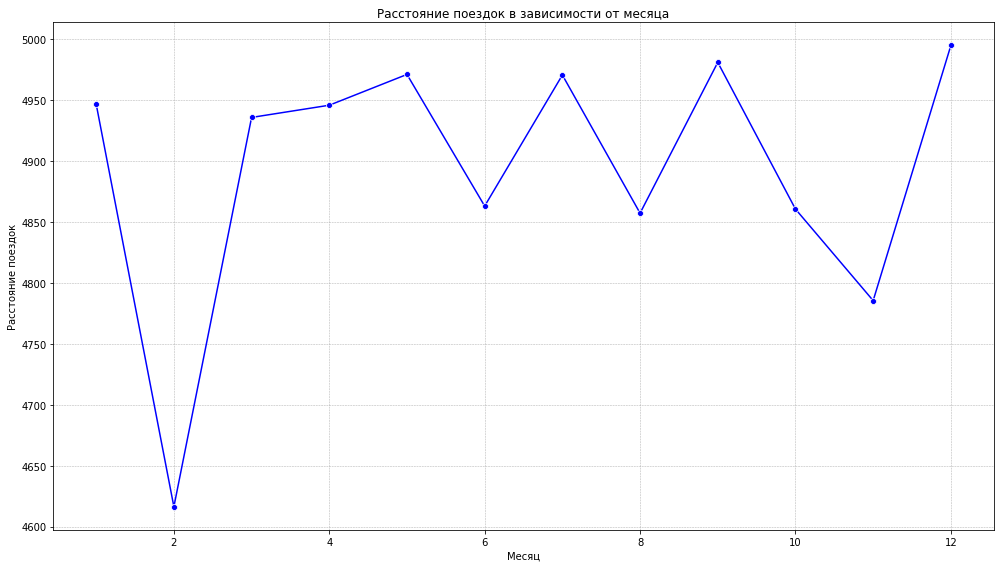

In [ ]:
#визуализация суммарного расстояния в зависимости от месяца поездки
# Настроим стиль графиков
plt.figure(figsize=(14, 8))

# Группировка данных по месяцам и подсчет средней дистанции для каждого месяца
monthly_distance = aggregated_data.groupby('month_of_ride')['total_distance'].mean()

sns.lineplot(data=monthly_distance, marker='o', color='blue')

plt.title('Расстояние поездок в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Расстояние поездок')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

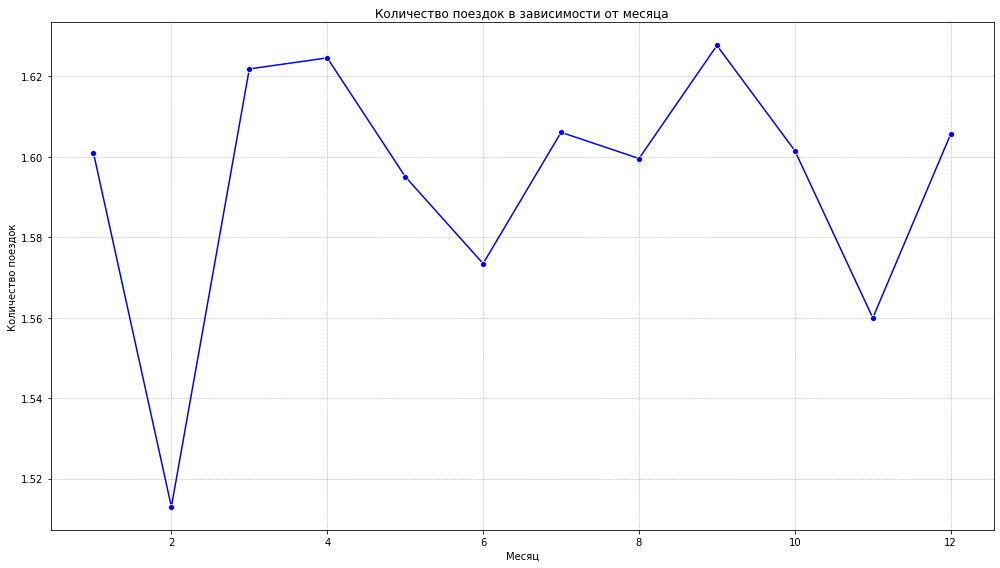

In [ ]:
#визуализация количества поездок в зависимости от месяца
# Настроим стиль графиков
plt.figure(figsize=(14, 8))

# Группировка данных по месяцам и подсчет средней длительности для каждого месяца
monthly_rides = aggregated_data.groupby('month_of_ride')['total_rides'].mean()

sns.lineplot(data=monthly_rides, marker='o', color='blue')

plt.title('Количество поездок в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество поездок')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Расчет помесячной выручки
#Помесячная выручка считается по формуле: (стоимость старта поездки ×количество поездок) +стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.
aggregated_data['monthly_revenue'] = (aggregated_data['start_ride_price'] * aggregated_data['total_rides']) + (aggregated_data['minute_price'] * aggregated_data['rounded_duration']) + aggregated_data['subscription_fee']

In [ ]:
aggregated_data.head()

,user_id,month_of_ride,subscription_type,total_distance,total_rides,rounded_duration,ride_cost,subscription_fee,start_ride_price,minute_price,monthly_revenue
0,1,1,ultra,7027.511294,2,42.0,252.0,199,0,6,451.0
1,1,4,ultra,754.159807,1,7.0,42.0,199,0,6,241.0
2,1,8,ultra,6723.470560,2,46.0,276.0,199,0,6,475.0
3,1,10,ultra,5809.911100,2,32.0,192.0,199,0,6,391.0
4,1,11,ultra,7003.499363,3,56.0,336.0,199,0,6,535.0


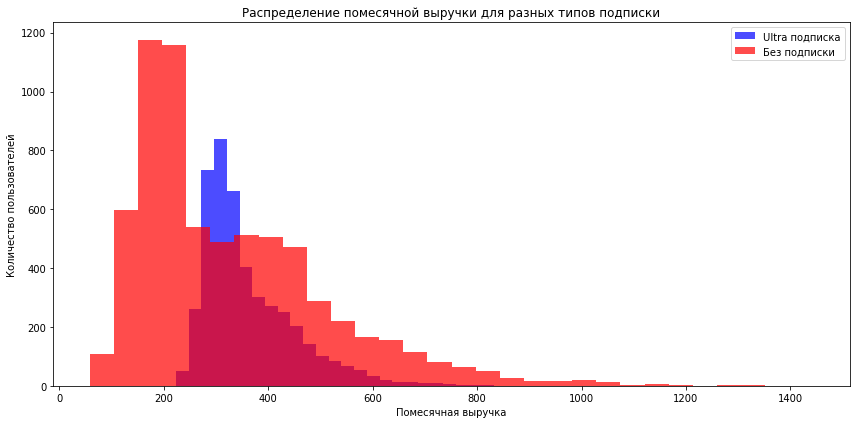

In [ ]:
# Выберем данные для пользователей с подпиской 'ultra'
ultra_data= aggregated_data[aggregated_data['subscription_type'] == 'ultra']['monthly_revenue']

# Выберем данные для пользователей без подписки 'free'
free_data= aggregated_data[aggregated_data['subscription_type'] == 'free']['monthly_revenue']

# Нарисуем гистограмму для пользователей с подпиской 'ultra'
plt.figure(figsize=(12, 6))
plt.hist(ultra_data, bins=30, alpha=0.7, label='Ultra подписка', color='blue')

# Нарисуем гистограмму для пользователей без подписки 'free'
plt.hist(free_data, bins=30, alpha=0.7, label='Без подписки', color='red')

plt.title('Распределение помесячной выручки для разных типов подписки')
plt.xlabel('Помесячная выручка')
plt.ylabel('Количество пользователей')
plt.legend()

plt.tight_layout()
plt.show()

Вывод Подсчёт выручки:
На данном этапе была проведена ключевая работа по подсчёту финансовой эффективности работы сервиса GoFast. В результате агрегации и расчетов были получены следующие основные результаты:

Агрегированные данные:
Подсчет суммарного расстояния, количества поездок и суммарного времени для каждого пользователя позволил выявить активность клиентов по месяцам. Февраль стал самым не активным месяцем (можно предположить, что погодные условия не располагали к поездкам на самокате).Самые длительные поездки пользователи совершали в апреле, а самые короткие в феврале. Самые длительные по растоянию поездки пользователи совершали в сентябре и декабре. А самые короткие по расстоянию в феврале.Наибольшее количество поездок пользователи совершили в апреле и сентябре, наименьшее - в феврале.   
Подсчет помесячной выручки:  
Вычисление выручки, которую приносит каждый пользователь, позволило оценить не только качественные, но и количественные показатели работы сервиса. Учет разных условий оплаты для пользователей с подпиской и без нее дал возможность понять, что категория пользователей с подпиской приносит больше дохода, но пользователей с подпиской меньше.  
Округление времени поездки до следующего целого числа гарантирует, что расчеты выручки будут корректными, учитывая условия тарификации.
В целом, на этапе подсчёта выручки была выполнена важная работа по оценке финансового вклада каждого пользователя в общий доход компании. Эта информация может быть использована для дальнейшей оптимизации маркетинговых кампаний, а также для корректировки тарифных планов в зависимости от потребностей и поведения пользователей.


#### Шаг 6. Проверка гипотез

Задача 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

<!-- #Гипотеза: H0 - Среднее время поездок для пользователей с подпиской и без подписки статистически значимо различается


#Гипотеза Н1 -Среднее время поездок для пользователей с подпиской и без подписки статистически значимо не различается -->


Гипотеза: H0 - Среднее время поездок пользователей с подпиской равно среднему времени поездок пользователей без подписки


Гипотеза Н1 -Среднее время поездок пользователей с подпиской  больше среднего времени поездок пользователей без подписки

In [ ]:
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_ride,minute_price,start_ride_price,subscription_fee,rounded_duration,ride_cost
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,26.0,156.0
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,16.0,96.0
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,7.0,42.0
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,19.0,114.0
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,27.0,162.0


In [ ]:
#Разделение данных на пользователей с подпиской и без подписки
users_with_ultra_subscription = merged_data[merged_data['subscription_type'] == 'ultra']
users_without_subscription = merged_data[merged_data['subscription_type'] == 'free']

In [ ]:
# # Проведение t-теста для сравнения средних
# t_stat, p_value = ttest_ind(users_with_ultra_subscription['rounded_duration'], users_without_subscription['rounded_duration'], equal_var=False,alternative='two-sided')
# print(p_value)
# # Анализ результатов
# if p_value < 0.05:
#     print("Среднее время поездок для пользователей с подпиской и без подписки статистически значимо различается. Есть основания отклонить гипотезу H0 в пользу H1")
# else:
#     print("Среднее время поездок для пользователей с подпиской и без подписки не различается статистически значимо. Нет оснований отклонить гипотезу H0")

In [ ]:
# Проведение t-теста для сравнения средних
t_stat, p_value = ttest_ind(users_with_ultra_subscription['rounded_duration'], users_without_subscription['rounded_duration'], equal_var=False,alternative='greater')
print(p_value)
# Анализ результатов
if p_value < 0.05:
    print("Среднее время поездок для пользователей с подпиской и без подписки статистически значимо различается. Есть основания отклонить гипотезу H0 в пользу H1")
else:
    print("Среднее время поездок для пользователей с подпиской и без подписки не различается статистически значимо. Нет оснований отклонить гипотезу H0")

1.1814679253701353e-36
Среднее время поездок для пользователей с подпиской и без подписки статистически значимо различается. Есть основания отклонить гипотезу H0 в пользу H1


In [ ]:
mean_duration_with__ultra_subscription = users_with_ultra_subscription['rounded_duration'].mean()
mean_duration_without_subscription = users_without_subscription['rounded_duration'].mean()

display("Среднее время поездок для пользователей с подпиской:", mean_duration_with__ultra_subscription)
display("Среднее время поездок для пользователей без подписки:", mean_duration_without_subscription)

'Среднее время поездок для пользователей с подпиской:'

19.037692307692307

'Среднее время поездок для пользователей без подписки:'

17.890992392807746

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0: Среднее расстояние поездки для пользователей с подпиской не превышает 3130 метров.  
H1: Среднее расстояние поездки для пользователей с подпиской превышает 3130 метров.


In [ ]:
# Проведение t-теста для сравнения среднего расстояния с заданным значением


# # Заданное значение расстояния
distance_threshold = 3130
t_stat, p_value = ttest_1samp(users_with_ultra_subscription['distance'], distance_threshold, alternative='greater')
print(p_value)
print(users_with_ultra_subscription['distance'].mean())
# Анализ результатов
if p_value < 0.05:
    print("Среднее расстояние поездки для пользователей с подпиской статистически значимо превышает заданное значение 3130 метров. Есть основания отклонить H0.")
else:
    print("Нет достаточно оснований для отклонения гипотезы H0. Среднее расстояние поездки для пользователей с подпиской не превышает 3130 метров.")



# # Заданное значение расстояния
# distance_threshold = 3130


# # Проведение t-теста для сравнения среднего расстояния с заданным значением
# t_stat, p_value = ttest_1samp(users_with_ultra_subscription['distance'], distance_threshold, alternative='greater')
# print(p_value)
# print(users_with_ultra_subscription['distance'].mean())
# # Анализ результатов
# if p_value < 0.05:
#     print("Среднее расстояние поездки для пользователей с подпиской статистически значимо отличается от заданного значения.")
#     if users_with_ultra_subscription['total_distance'].mean() > distance_threshold:
#         print("Среднее расстояние поездки для пользователей с подпиской превышает 3130 метров. Есть основания отклонить H0")
#     else:
#         print("Среднее расстояние поездки для пользователей с подпиской не превышает 3130 метров. Нет достаточно оснований для отклонения гипотезы H0")
# else:
#     print("Среднее расстояние поездки для пользователей с подпиской не отличается статистически от заданного значения.")

0.9195368847849785
3115.4453880370247
Нет достаточно оснований для отклонения гипотезы H0. Среднее расстояние поездки для пользователей с подпиской не превышает 3130 метров.


Задача 6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0: Средняя помесячная выручка от пользователей с подпиской не отличается от выручки от пользователей без подписки.  
H1: Средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [ ]:
# Проведение t-теста для сравнения средних помесячных выручек двух выборок
t_stat, p_value = ttest_ind(ultra_data, free_data, equal_var=False, alternative='greater')
print (p_value)
print(ultra_data.mean())
print(free_data.mean())
# Анализ результатов
if p_value < 0.05:
    print("Средняя помесячная выручка от пользователей с подпиской статистически значимо выше, чем выручка от пользователей без подписки. Есть основания отвергнуть H0")
else:
    print("Нет статистически значимого различия в средней помесячной выручке от пользователей с подпиской и без подписки.")

8.874140893976874e-40
362.7921906022502
328.6413651073845
Средняя помесячная выручка от пользователей с подпиской статистически значимо выше, чем выручка от пользователей без подписки. Есть основания отвергнуть H0


Задача:
  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?  

Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, можно использовать парный t-тест (paired t-test) для зависимых выборок.

Ситуация описывается следующим образом:

У нас есть данные о количестве обращений в техподдержку для каждого пользователя до и после обновления серверов.
Каждая пара данных для одного пользователя связана (значение до и после обновления относится к одному и тому же пользователю).
Нам интересно узнать, есть ли статистически значимая разница в среднем количестве обращений до и после обновления.
Следовательно, мы можем использовать парный t-тест для проверки гипотезы о равенстве средних количеств обращений до и после обновления. Если p-value будет меньше уровня значимости (обычно 0.05), то мы можем сделать вывод, что количество обращений в техподдержку значимо снизилось после обновления серверов. В противном случае, нет статистически значимой разницы в количестве обращений.

Вывод: проверка гипотез    


Пользователи с подпиской в среднем проводят больше времени на поездках. Это может указывать на то, что для них услуга более ценна или что условия подписки позволяют им чаще или дольше пользоваться сервисом.  

Пользователи с подпиской в среднем проезжают расстояние, близкое к оптимальному для износа самоката. Это может быть полезной информацией для планирования технического обслуживания или определения оптимального маршрута для пользователей.  

Помесячная выручка от пользователей с подпиской выше. Это подтверждает идею о том, что такие пользователи могут быть более "выгодными" для компании. Это также может служить основанием для активного продвижения подписок среди текущих и потенциальных клиентов.  

После проведения технического обновления желательно использовать статистический тест для определения влияния обновления на количество обращений в техподдержку. Если снижение статистически значимо, это может указывать на улучшение работы сервиса для пользователей.


#### Шаг 7. Распределения

Задача 7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 %пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 % Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


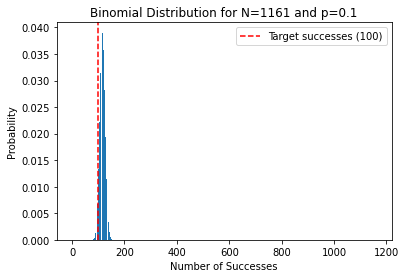

Минимальное количество промокодов, которое нужно разослать: 1161


In [ ]:
# параметры
p = 0.1
target_successes = 100
target_probability = 0.95

# диапазон возможных значений N
N_values = np.arange(1000, 2000)  # допустим, что максимальное значение N - 2000
probs = [1 - binom(N, p).cdf(target_successes - 1) for N in N_values]

# найдем первое значение N, для которого вероятность превышает 0.95
N_required = N_values[np.argmax(np.array(probs) > target_probability)]

# построим график распределения
x = np.arange(0, N_required+1)
plt.bar(x, binom.pmf(x, N_required, p))
plt.axvline(x=target_successes, color='r', linestyle='dashed', label="Target successes (100)")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution for N={N_required} and p={p}")
plt.legend()
plt.show()

print(f"Минимальное количество промокодов, которое нужно разослать: {N_required}")

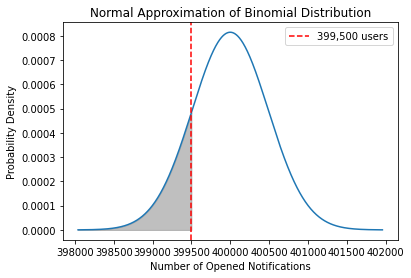

Вероятность того, что уведомление откроют не более 399,500 пользователей: 0.1537


In [ ]:
# Параметры
N = 1000000
p = 0.4
mu = N * p
sigma = np.sqrt(N * p * (1 - p))

# Расчет вероятности
probability = norm.cdf(399500, mu, sigma)

# Построение графика
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.axvline(x=399500, color='r', linestyle='dashed', label="399,500 users")
plt.fill_between(x, norm.pdf(x, mu, sigma), where=(x <= 399500), color='gray', alpha=0.5)
plt.xlabel("Number of Opened Notifications")
plt.ylabel("Probability Density")
plt.title("Normal Approximation of Binomial Distribution")
plt.legend()
plt.show()

print(f"Вероятность того, что уведомление откроют не более 399,500 пользователей: {probability:.4f}")

Выводы:Распределения

Акция с промокодами: Для достижения цели продления подписки минимум 100 пользователями, компании GoFast необходимо разослать 1161 промокод, предоставляющий один бесплатный месяц подписки. Это обеспечивает приемлемый уровень риска (5%), что акция может не дать ожидаемого результата.  
Push-уведомления: При планировании рассылки 1 млн уведомлений и ожидаемой вероятности открытия в 40%, существует 15.37% вероятность того, что уведомление откроют не более 399,500 пользователей. Этот результат может помочь отделу маркетинга определить ожидаемую отдачу от масштабной рассылки и понять потенциальные риски.

**ОБЩИЕ ВЫВОДЫ**

Были проанализированы данные и провены гипотезы, которые могут помочь бизнесу вырасти.  
Пользователи с подпиской в среднем проводят больше времени на поездках. Это может указывать на то, что для них услуга более ценна или что условия подписки позволяют им чаще или дольше пользоваться сервисом.  
Пользователи с подпиской в среднем проезжают расстояние, близкое к оптимальному для износа самоката. Это может быть полезной информацией для планирования технического обслуживания или определения оптимального маршрута для пользователей.  
Помесячная выручка от пользователей с подпиской выше. Это подтверждает идею о том, что такие пользователи могут быть более "выгодными" для компании. Это также может служить основанием для активного продвижения подписок среди текущих и потенциальных клиентов.

Шаг 1: Загрузка данных  
Данные успешно загружены из трёх CSV-файлов: users_go.csv, rides_go.csv, и subscriptions_go.csv.
Первичный анализ показал структуру и содержание каждого из датафреймов.

Шаг 2: Предобработка данных  
Столбец date был успешно приведен к формату даты.
Добавлен новый столбец с номером месяца для анализа данных в разрезе месяцев.
Пропущенные значения отсутствовали, дубликаты были идентифицированы(62 строки)и удалены.  

Шаг 3: Исследовательский анализ данных
Проанализированы и визуализированы основные характеристики пользователей и поездок: распределение пользователей по городам, соотношение пользователей с подпиской и без, возрастное распределение, а также распределения по расстоянию и продолжительности поездок.  
Частота встречаемости городов:  В данных присутствуют пользователи из нескольких городов. Некоторые города представлены активнее, возможно, из-за более активной рекламной кампании. Определены лидирующие города по активности пользователей, что может указывать на наиболее перспективные рынки для развития или усиления маркетинговых усилий.  Больше всего пользователей в Пятигорске(219), а меньше всего в Москве(168)  
Соотношение пользователей с подпиской и без подписки:Было установлено, что  подписки нет у большего количества людей(835), а с подпиской ultra всего 699.   
Возраст пользователей:В данных выявлен диапазон возрастов пользователей.Они представляют собой широкий диапазон от подростков 12 лет до среднего возраста с максимумом в 43 года, чаще всего пользуются самокатами молодые люди 25 лет.   
Расстояние, которое пользователь преодолел за одну поездку:  Большинство поездок совершается на среднее расстояние чуть больше 3х км(3133.60м), но также на гистограмме можно увидеть и большое количество  коротких поездок. Вероятно самокаты часто используются для коротких поездок( например,от метро до дома)  
Продолжительность поездок:  Пользователи в среднем проводят 17.67 минут в пути на самокатах.

Шаг 4: Объединение данных
Данные о пользователях, поездках и подписках успешно объединены в один датафрейм.
Созданы два отдельных датафрейма для пользователей с подпиской и без.
Визуализирована информация о расстоянии и времени поездок для обеих категорий пользователей.
На основе графиков можно сделать вывод о том, что расстояние и продолжительность поездок различаются между пользователями с подпиской и без неё. Возможно, пользователи с подпиской чаще пользуются самокатами для длительных поездок или на большие расстояния, благодаря льготным условиям использования. Медианное время поездки с подпиской - 18.17 минуты,а медианное время поездки без подписки 17.32. Это значит, что пользователи с подпиской тратят в среднем примерно на минуту больше на поездку чем без подписки. Пользователи с подпиской реже совершают короткие поездки. Также медианная дистанция поездок у пользователей с подпиской выше (3148метров) чем у пользователей без подписки (3114.64 метра).

Шаг 5: Подсчёт выручки
Создан датафрейм с агрегированными данными о поездках: суммарное расстояние, количество поездок, суммарное время для каждого пользователя за каждый месяц.
Добавлен столбец с помесячной выручкой, учитывая условия оплаты и округление продолжительности поездок.
Подсчет суммарного расстояния, количества поездок и суммарного времени для каждого пользователя позволил выявить активность клиентов по месяцам. Февраль стал самым не активным месяцем (можно предположить, что погодные условия не располагали к поездкам на самокате).Самые длительные поездки пользователи совершали в апреле, а самые короткие в феврале. Самые длительные по растоянию поездки пользователи совершали в сентябре и декабре. А самые короткие по расстоянию в феврале.Наибольшее количество поездок пользователи совершили в апреле и сентябре, наименьшее - в феврале.   
Подсчет помесячной выручки:  
Вычисление выручки, которую приносит каждый пользователь, позволило оценить не только качественные, но и количественные показатели работы сервиса. Учет разных условий оплаты для пользователей с подпиской и без нее дал возможность понять, что категория пользователей с подпиской приносит больше дохода, но пользователей с подпиской меньше.

Шаг 6 Проверка гипотез:

1.Пользователи с подпиской и их активность:  
Пользователи с подпиской в среднем проводят больше времени на поездках по сравнению с пользователями без подписки. Этот факт высвечивает важность подписчиков для бизнеса: они, вероятно, считают услугу более ценной и интегрируют ее в свою повседневную жизнь. Кроме того, это может свидетельствовать о том, что условия подписки обеспечивают им большую гибкость или стимулируют к частому использованию сервиса.
2 Оптимальное расстояние и техническое обслуживание:
Отмечено, что пользователи с подпиской в среднем проезжают расстояние, которое является оптимальным с точки зрения износа самоката. Это дает ценные данные для отдела технического обслуживания. Понимание того, как часто самокаты нуждаются в обслуживании, позволит компании эффективнее распределять ресурсы и минимизировать простой самокатов.
3 Экономическая эффективность подписчиков:  
Подписчики приносят компании больше выручки помесячно. Это критически важная информация для отдела маркетинга. Продвигая подписочную модель, компания может увеличивать свои доходы, стимулируя пользователей переходить на подписные планы. Это также может подсказать компании о необходимости предоставления дополнительных инцентивов или бонусов для подписчиков, чтобы привлекать и удерживать их.
4 Техническое обновление и обращения в службу поддержки:  
После проведения технического обновления было бы стратегически правильным провести статистический тест на влияние обновления на количество обращений в службу поддержки. Уменьшение обращений, если оно статистически значимо, является показателем успешности обновления. Это также может служить индикатором удовлетворенности пользователей и качества сервиса.  

Шаг 7 Распределения
Проанализировано распределение акции с промокодами, определено минимальное количество промокодов (1161) для достижения целевого количества продлений подписки.
Оценена вероятность успешного открытия push-уведомлений, которая составила 15.37%.


Заключение: Исследование показало, что пользователи с подпиской имеют особую ценность для бизнеса как с точки зрения активности, так и экономического вклада. Чтобы максимизировать прибыль и удовлетворенность пользователей, компании следует уделять особое внимание условиям и преимуществам подписки, а также техническому обслуживанию и оптимизации своего продукта.




**Итоговый вывод**:

Благодаря анализу данных и проверке гипотез, ,можно сделать следующие ключевые выводы:  

Пользователи с подпиской проводят больше времени на поездках. Это может говорить о том, что услуга для них имеет большую ценность, или что условия подписки позволяют им чаще или дольше пользоваться сервисом.  
Пользователи с подпиской в среднем проезжают расстояние, близкое к оптимальному для износа самоката. Это важная информация для планирования технического обслуживания и определения оптимального маршрута.  
Помесячная выручка от пользователей с подпиской выше, что делает их потенциально более "выгодными" для компании.
На основе этих выводов, рекомендую:  

1.Активно продвигать подписки среди текущих и потенциальных пользователей, поскольку они приносят больше выручки и демонстрируют большую лояльность к сервису.  
2.Рассмотреть возможность оптимизации маршрутов или предоставления рекомендаций по маршрутам для пользователей на основе среднего расстояния поездки, чтобы минимизировать износ самокатов и оптимизировать процесс технического обслуживания.
3.Уделить внимание улучшению условий подписки или введению новых типов подписок, чтобы привлечь больше пользователей к регулярному использованию сервиса.  